(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


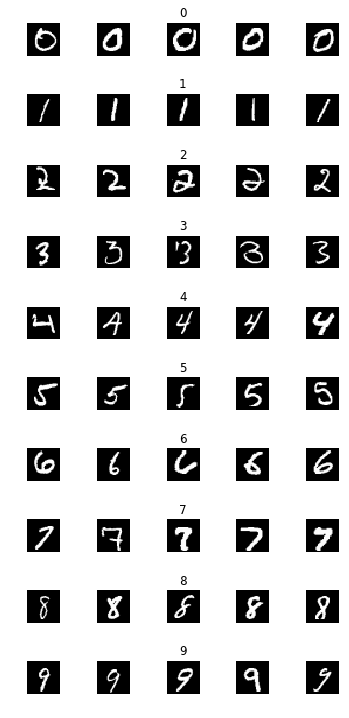

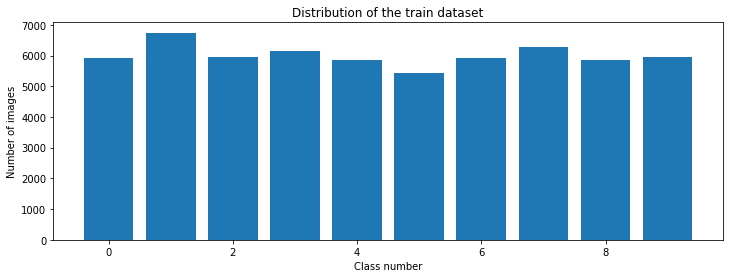

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

import random


np.random.seed(0)



(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))



print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255


In [0]:
# define the LeNet model function

def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes,activation = 'softmax'))
  model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [32]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
__________

In [33]:
h = model.fit(X_train,y_train,epochs=10,validation_split = 0.1,batch_size = 400, verbose = 1, shuffle = 1)




Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.2480 - acc: 0.9193 - val_loss: 0.0475 - val_acc: 0.9867
Epoch 2/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0692 - acc: 0.9785 - val_loss: 0.0370 - val_acc: 0.9895
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0617 - acc: 0.9812 - val_loss: 0.0401 - val_acc: 0.9890
Epoch 4/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0329 - val_acc: 0.9912
Epoch 5/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0454 - acc: 0.9854 - val_loss: 0.0299 - val_acc: 0.9915
Epoch 6/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0434 - acc: 0.9866 - val_loss: 0.0345 - val_acc: 0.9907
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0375 - val_acc:

Text(0.5, 0, 'epoch')

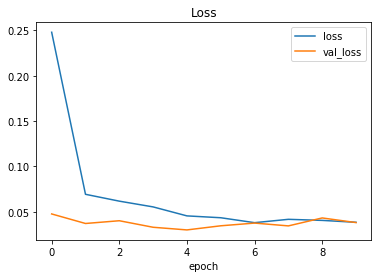

In [34]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

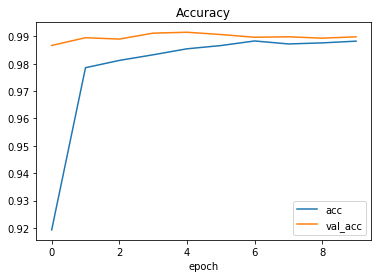

In [35]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

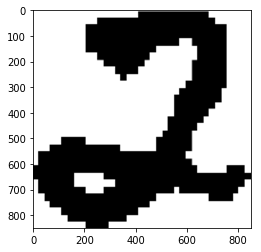

In [36]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
#url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

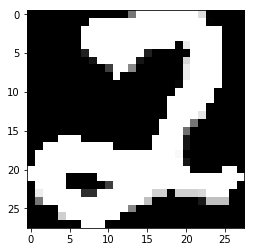

In [37]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [38]:
img = img/255
img = img.reshape(1, 28,28,1)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [39]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test score : ',score[0])
print('Test accuracy : ',score[1])

Test score :  0.036315150665181
Test accuracy :  0.9902
